In [ ]:
!pip install --upgrade tensorflow


In [ ]:
import os # Import the os module to interact with the operating system
import imghdr # Import imghdr module to determine image types
import cv2 # Import cv2 module for image processing if needed

# list of acceptable image extensions



In [ ]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file


Saving kaggle(1).json to kaggle(1).json


{'kaggle(1).json': b'{"username":"anrgy91","key":"0d610ecf7dc4c5dbe5c7e498d1ba01cf"}'}

In [ ]:
!kaggle datasets download -d msambare/fer2013
!unzip fer2013.zip


Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:
# list of acceptable image extensions
image_exts = ['jpeg', 'jpg', 'png']

# Path to the directory containing image classes and possibly other nested subdirectories
data_dir = 'train'

# Walk through all directories and files in the dataset
for root, dirs, files in os.walk(data_dir):
    for file in files:
        # Construct the path to the current file
        file_path = os.path.join(root, file)

        try:
            # Check the file type of the current file
            file_type = imghdr.what(file_path)

            # If the file extension is not in the allowed list, remove it
            if file_type not in image_exts:
                print(f'Image not in ext list {file_path}')
                os.remove(file_path)
            else:
                # Proceed to process the image if needed, for example, reading it with OpenCV
                img = cv2.imread(file_path)

        except Exception as e:
            # Print out the issue and the path of the problematic file
            print(f'Issue with file {file_path}. Error: {e}')
            # Optionally, remove files that cause exceptions
            os.remove(file_path)

In [ ]:

import os
import pandas as pd  # Import the pandas library

# This function returns a DataFrame with these counts, indexed by a specified
def count_files_in_subdirs(directory, set_name):
    counts = {}

    # Iterate over each item in the given directory.
    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)

        # Check if the item is a directory.
        if os.path.isdir(item_path):
            # Count the number of files in the subdirectory and add it to the dictionary.
            counts[item] = len(os.listdir(item_path))

    # The index of the DataFrame is set to the provided set name.
    df = pd.DataFrame(counts, index=[set_name])
    return df

# Paths to the training and testing directories.
train_dir = 'train'
test_dir = 'test'

# Count the files in the subdirectories of the training directory and testing directory and print the result.
train_count = count_files_in_subdirs(train_dir, 'train')
print(train_count)

test_count = count_files_in_subdirs(test_dir, 'test')
print(test_count)


       surprise  angry  fear  happy  disgust   sad  neutral
train      3171   3995  4097   7215      436  4830     4965
      surprise  angry  fear  happy  disgust   sad  neutral
test       831    958  1024   1774      111  1247     1233


<Axes: >

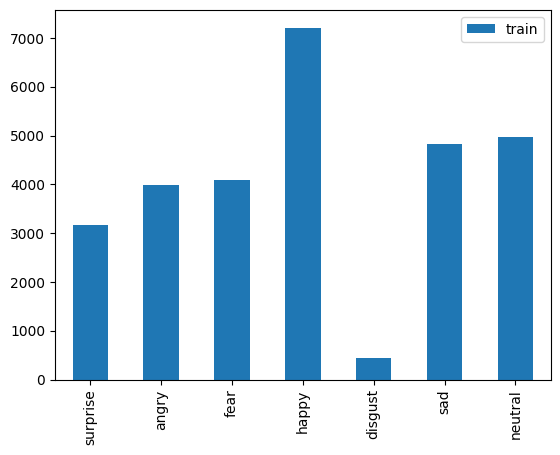

In [ ]:
train_count.transpose().plot(kind='bar')

<Axes: >

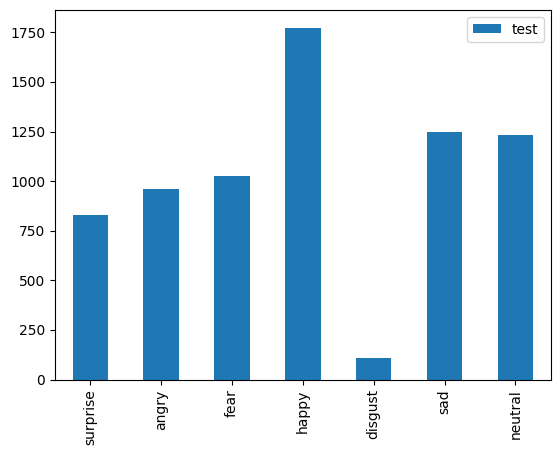

In [ ]:
test_count.transpose().plot(kind='bar')

In [ ]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib
import random # Import the random module


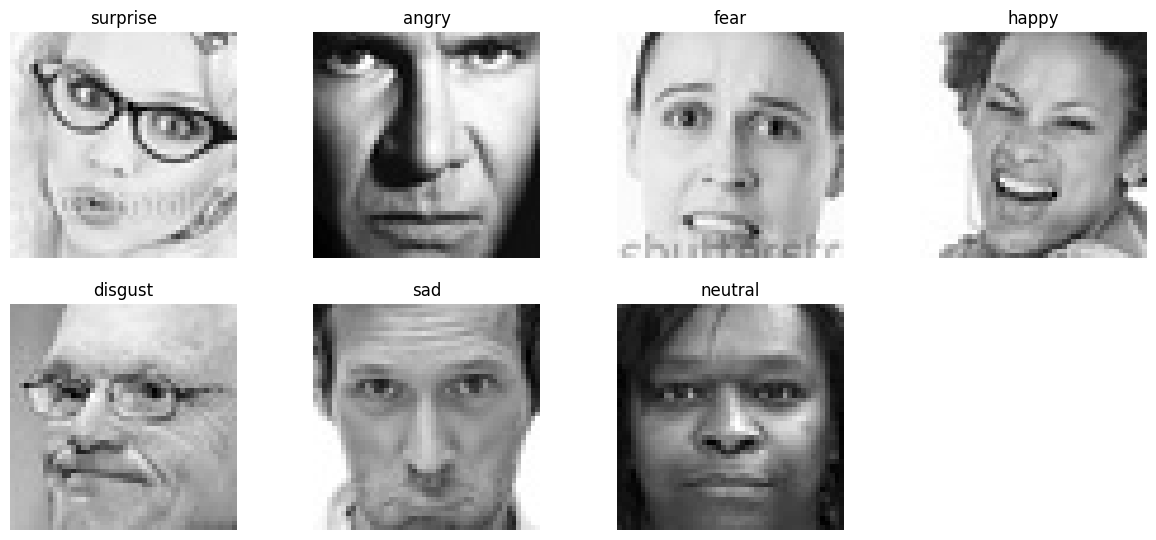

In [ ]:
emotions = os.listdir(train_dir)
plt.figure(figsize=(15,10))

for i, emotion in enumerate(emotions, 1):
    folder = os.path.join(train_dir, emotion)
    img_path = os.path.join(folder, os.listdir(folder)[42])
    img = plt.imread(img_path)
    plt.subplot(3, 4, i)
    plt.imshow(img, cmap='gray')
    plt.title(emotion)
    plt.axis('off')

In [ ]:
def plot_images_from_directory(directory_path, class_name, num_images=9):
    # Retrieve list of all file names in the directory
    image_filenames = os.listdir(directory_path)

    # If there are fewer images than requested, we'll just show them all
    if len(image_filenames) < num_images:
        print(f"Only found {len(image_filenames)} images in {directory_path}, displaying them all.")
        num_images = len(image_filenames)

    # Randomly select 'num_images' number of file names
    selected_images = random.sample(image_filenames, num_images)

    # Plotting the images
    fig, axes = plt.subplots(3, 3, figsize=(5, 5))  # Adjust the size as needed
    axes = axes.ravel()

    for i, image_file in enumerate(selected_images):
        image_path = os.path.join(directory_path, image_file)
        # image = Image.open(image_path)
        image = load_img(image_path)
        axes[i].imshow(image)
        axes[i].set_title(f"Image: {class_name}")
        axes[i].axis('off')  # Hide the axis

    plt.tight_layout()
    plt.show()

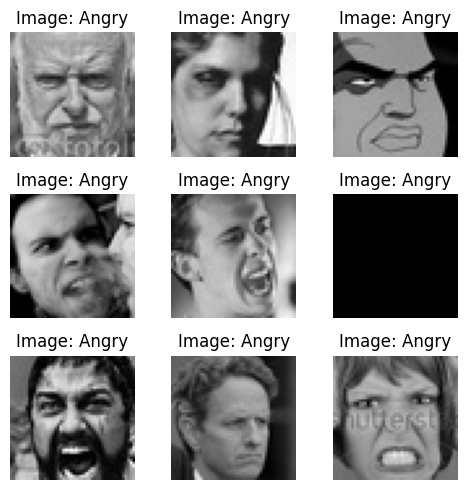

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
angry_directory_path = 'train/angry'
plot_images_from_directory(angry_directory_path, class_name = 'Angry')

RNNN
  **
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  **

In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import os
from tqdm import tqdm
from PIL import Image

# Define the data transforms
data_transforms = {
    'train': transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((48, 48)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20),
        transforms.RandomAffine(0, translate=(0.2, 0.2), scale=(0.8, 1.2)),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ]),
    'val': transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((48, 48)),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ]),
    'test': transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((48, 48)),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ])
}

# Define directories
train_dir = 'train'
test_dir = 'test'

# Load datasets
full_train_dataset = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
test_dataset = datasets.ImageFolder(test_dir, transform=data_transforms['test'])

# Split train dataset into train and validation
train_size = int(0.8 * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size
train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])
val_dataset.dataset.transform = data_transforms['val']

# Create data loaders
batch_size = 125
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Define the CNN + RNN model
class EmotionRNN(nn.Module):
    def __init__(self, num_classes=7):
        super(EmotionRNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25),

            nn.Conv2d(64, 128, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25),

            nn.Conv2d(128, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(512),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25),

            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(512),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25),
        )
        self.rnn = nn.RNN(input_size=512*3*3, hidden_size=128, num_layers=2, batch_first=True, dropout=0.25)
        self.classifier = nn.Sequential(
            nn.Linear(128, 256),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(256),
            nn.Dropout(0.25),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = x.unsqueeze(1)  # Add sequence dimension
        x, _ = self.rnn(x)
        x = x[:, -1, :]
        x = self.classifier(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EmotionRNN().to(device)

# Define loss, optimizer, and scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

# Early stopping class
class EarlyStopping:
    def __init__(self, patience=7, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif self.best_loss - val_loss > self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        elif self.best_loss - val_loss < self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

early_stopping = EarlyStopping(patience=10, min_delta=0.01)

# Training function



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [ ]:
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, early_stopping, num_epochs):
    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training"):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total

        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation"):
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()

        val_epoch_loss = val_loss / len(val_loader.dataset)
        val_epoch_acc = val_correct / val_total

        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc)

        scheduler.step(val_epoch_loss)
        early_stopping(val_epoch_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered")
            break

        print(f"Epoch {epoch+1}/{num_epochs}")
        print(f"Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_acc:.4f}")
        print(f"Val Loss: {val_epoch_loss:.4f}, Val Accuracy: {val_epoch_acc:.4f}")

    return train_losses, train_accuracies, val_losses, val_accuracies


Epoch 1/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 18.05it/s]


Epoch 1/100
Train Loss: 1.9828, Train Accuracy: 0.2021
Val Loss: 1.8338, Val Accuracy: 0.2844


Epoch 2/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 18.44it/s]


Epoch 2/100
Train Loss: 1.8598, Train Accuracy: 0.2735
Val Loss: 1.7474, Val Accuracy: 0.3285


Epoch 3/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 17.70it/s]


Epoch 3/100
Train Loss: 1.7633, Train Accuracy: 0.3292
Val Loss: 1.6690, Val Accuracy: 0.3570


Epoch 4/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 18.41it/s]


Epoch 4/100
Train Loss: 1.6828, Train Accuracy: 0.3592
Val Loss: 1.6438, Val Accuracy: 0.3708


Epoch 5/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 18.41it/s]


Epoch 5/100
Train Loss: 1.6234, Train Accuracy: 0.3835
Val Loss: 1.5679, Val Accuracy: 0.3976


Epoch 6/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 18.26it/s]


Epoch 6/100
Train Loss: 1.5709, Train Accuracy: 0.4019
Val Loss: 1.5230, Val Accuracy: 0.4162


Epoch 7/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 17.91it/s]


Epoch 7/100
Train Loss: 1.5222, Train Accuracy: 0.4243
Val Loss: 1.4907, Val Accuracy: 0.4256


Epoch 8/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 18.49it/s]


Epoch 8/100
Train Loss: 1.4826, Train Accuracy: 0.4337
Val Loss: 1.4481, Val Accuracy: 0.4476


Epoch 9/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 18.08it/s]


Epoch 9/100
Train Loss: 1.4430, Train Accuracy: 0.4509
Val Loss: 1.4184, Val Accuracy: 0.4599


Epoch 10/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 18.23it/s]


Epoch 10/100
Train Loss: 1.4072, Train Accuracy: 0.4641
Val Loss: 1.3964, Val Accuracy: 0.4713


Epoch 11/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 17.55it/s]


Epoch 11/100
Train Loss: 1.3748, Train Accuracy: 0.4773
Val Loss: 1.3593, Val Accuracy: 0.4859


Epoch 12/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 16.95it/s]


Epoch 12/100
Train Loss: 1.3479, Train Accuracy: 0.4844
Val Loss: 1.3231, Val Accuracy: 0.5019


Epoch 13/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 17.86it/s]


Epoch 13/100
Train Loss: 1.3180, Train Accuracy: 0.4984
Val Loss: 1.2986, Val Accuracy: 0.5070


Epoch 14/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 18.03it/s]


Epoch 14/100
Train Loss: 1.2931, Train Accuracy: 0.5091
Val Loss: 1.2789, Val Accuracy: 0.5179


Epoch 15/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 18.31it/s]


Epoch 15/100
Train Loss: 1.2644, Train Accuracy: 0.5230
Val Loss: 1.2478, Val Accuracy: 0.5305


Epoch 16/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 18.05it/s]


Epoch 16/100
Train Loss: 1.2385, Train Accuracy: 0.5267
Val Loss: 1.2423, Val Accuracy: 0.5340


Epoch 17/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 17.58it/s]


Epoch 17/100
Train Loss: 1.2215, Train Accuracy: 0.5374
Val Loss: 1.2205, Val Accuracy: 0.5414


Epoch 18/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 18.31it/s]


Epoch 18/100
Train Loss: 1.1997, Train Accuracy: 0.5477
Val Loss: 1.2081, Val Accuracy: 0.5489


Epoch 19/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 17.95it/s]


Epoch 19/100
Train Loss: 1.1751, Train Accuracy: 0.5554
Val Loss: 1.1967, Val Accuracy: 0.5585


Epoch 20/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 18.05it/s]


Epoch 20/100
Train Loss: 1.1536, Train Accuracy: 0.5672
Val Loss: 1.1783, Val Accuracy: 0.5637


Epoch 21/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 18.61it/s]


Epoch 21/100
Train Loss: 1.1322, Train Accuracy: 0.5734
Val Loss: 1.1616, Val Accuracy: 0.5688


Epoch 22/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 17.77it/s]


Epoch 22/100
Train Loss: 1.1142, Train Accuracy: 0.5816
Val Loss: 1.1530, Val Accuracy: 0.5711


Epoch 23/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 18.47it/s]


Epoch 23/100
Train Loss: 1.0932, Train Accuracy: 0.5907
Val Loss: 1.1600, Val Accuracy: 0.5712


Epoch 24/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 18.03it/s]


Epoch 24/100
Train Loss: 1.0803, Train Accuracy: 0.5967
Val Loss: 1.1317, Val Accuracy: 0.5817


Epoch 25/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 17.76it/s]


Epoch 25/100
Train Loss: 1.0707, Train Accuracy: 0.5994
Val Loss: 1.1345, Val Accuracy: 0.5777


Epoch 26/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 18.00it/s]


Epoch 26/100
Train Loss: 1.0457, Train Accuracy: 0.6108
Val Loss: 1.1239, Val Accuracy: 0.5902


Epoch 27/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 17.67it/s]


Epoch 27/100
Train Loss: 1.0204, Train Accuracy: 0.6185
Val Loss: 1.1269, Val Accuracy: 0.5907


Epoch 28/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 17.63it/s]


Epoch 28/100
Train Loss: 1.0039, Train Accuracy: 0.6263
Val Loss: 1.1164, Val Accuracy: 0.5914


Epoch 29/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 18.15it/s]


Epoch 29/100
Train Loss: 0.9931, Train Accuracy: 0.6311
Val Loss: 1.1183, Val Accuracy: 0.5953


Epoch 30/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 18.26it/s]


Epoch 30/100
Train Loss: 0.9785, Train Accuracy: 0.6342
Val Loss: 1.1225, Val Accuracy: 0.5977


Epoch 31/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 18.63it/s]


Epoch 31/100
Train Loss: 0.9543, Train Accuracy: 0.6449
Val Loss: 1.1174, Val Accuracy: 0.5953


Epoch 32/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 17.60it/s]


Epoch 32/100
Train Loss: 0.9283, Train Accuracy: 0.6555
Val Loss: 1.1103, Val Accuracy: 0.6003


Epoch 33/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 17.55it/s]


Epoch 33/100
Train Loss: 0.9202, Train Accuracy: 0.6610
Val Loss: 1.1132, Val Accuracy: 0.5949


Epoch 34/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 17.57it/s]


Epoch 34/100
Train Loss: 0.9000, Train Accuracy: 0.6680
Val Loss: 1.1228, Val Accuracy: 0.6029


Epoch 35/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 18.06it/s]


Epoch 35/100
Train Loss: 0.8842, Train Accuracy: 0.6710
Val Loss: 1.1040, Val Accuracy: 0.6083


Epoch 36/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 17.69it/s]


Epoch 36/100
Train Loss: 0.8734, Train Accuracy: 0.6746
Val Loss: 1.0858, Val Accuracy: 0.6095


Epoch 37/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 17.55it/s]


Epoch 37/100
Train Loss: 0.8389, Train Accuracy: 0.6889
Val Loss: 1.1049, Val Accuracy: 0.6059


Epoch 38/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 17.72it/s]


Epoch 38/100
Train Loss: 0.8298, Train Accuracy: 0.6969
Val Loss: 1.1101, Val Accuracy: 0.6155


Epoch 39/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 17.77it/s]


Epoch 39/100
Train Loss: 0.8068, Train Accuracy: 0.7044
Val Loss: 1.1162, Val Accuracy: 0.6113


Epoch 40/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 17.76it/s]


Epoch 40/100
Train Loss: 0.7951, Train Accuracy: 0.7055
Val Loss: 1.1139, Val Accuracy: 0.6139


Epoch 41/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 17.91it/s]


Epoch 41/100
Train Loss: 0.7844, Train Accuracy: 0.7110
Val Loss: 1.1209, Val Accuracy: 0.6137


Epoch 42/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 17.94it/s]


Epoch 42/100
Train Loss: 0.7528, Train Accuracy: 0.7228
Val Loss: 1.1378, Val Accuracy: 0.6125


Epoch 43/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 18.18it/s]


Epoch 43/100
Train Loss: 0.7149, Train Accuracy: 0.7376
Val Loss: 1.1272, Val Accuracy: 0.6153


Epoch 44/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 18.11it/s]


Epoch 44/100
Train Loss: 0.6941, Train Accuracy: 0.7468
Val Loss: 1.1217, Val Accuracy: 0.6231


Epoch 45/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 18.12it/s]


Epoch 45/100
Train Loss: 0.6911, Train Accuracy: 0.7489
Val Loss: 1.1256, Val Accuracy: 0.6216


Epoch 46/100 - Validation: 100%|██████████| 46/46 [00:02<00:00, 18.10it/s]


Early stopping triggered


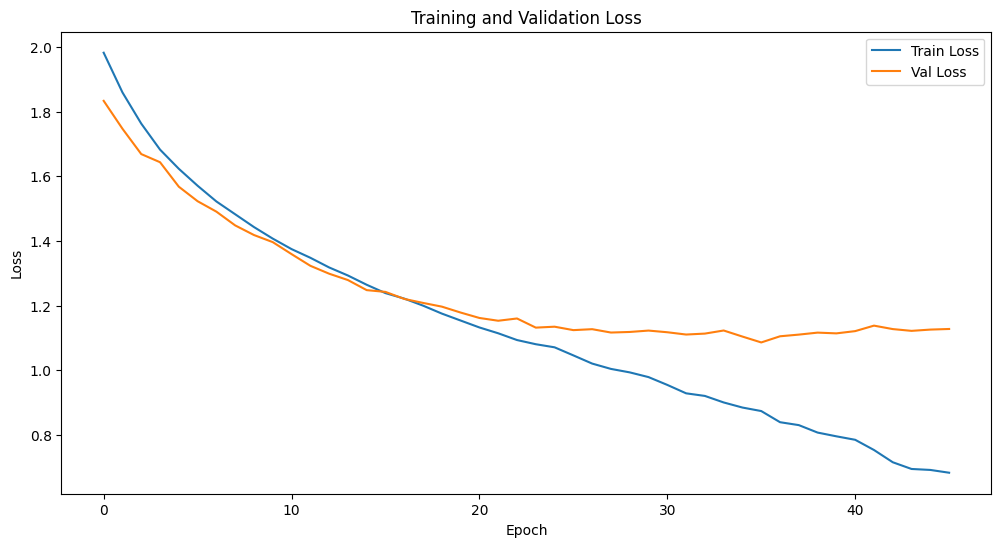

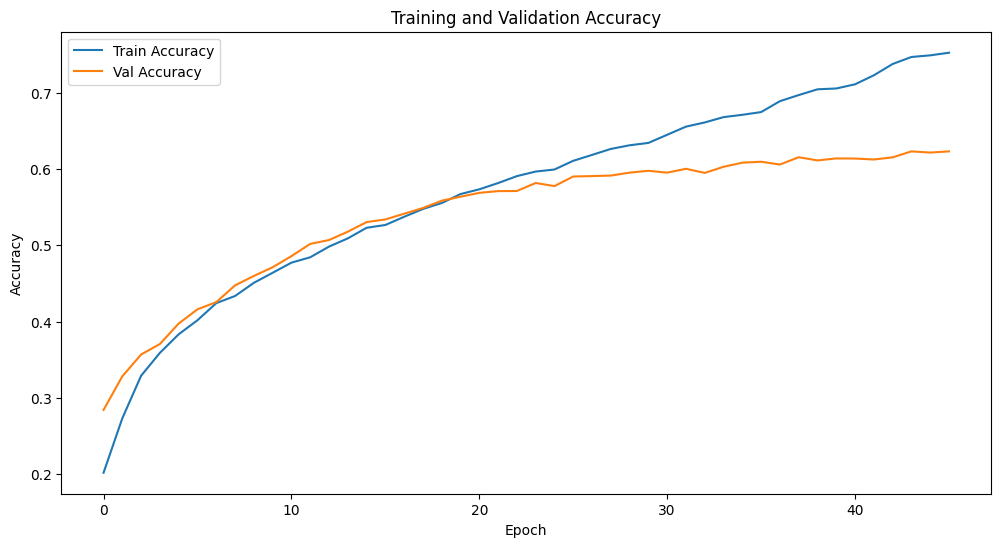

Evaluating: 100%|██████████| 58/58 [00:03<00:00, 17.85it/s]


Test Accuracy: 0.6248
True Negatives: [3981. 4424. 4112. 3015. 3737. 3838. 3803.]
False Positives: [427.  36. 318. 333. 592. 708. 279.]
False Negatives: [454.  50. 651. 304. 485. 600. 149.]
True Positives: [ 504.   61.  373. 1470.  748.  647.  682.]


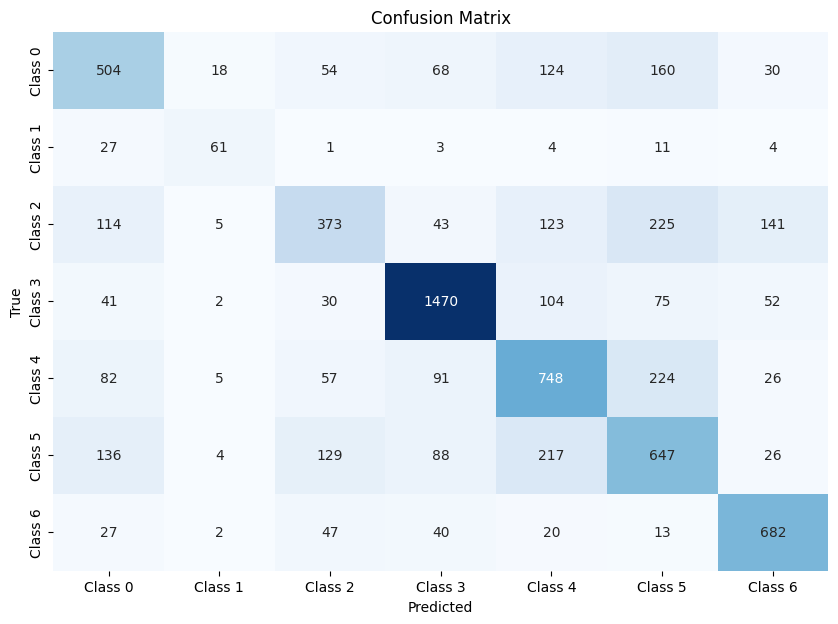

In [ ]:
# Evaluation function
def calculate_metrics(y_true, y_pred, num_classes):
    cm = confusion_matrix(y_true, y_pred, labels=range(num_classes))
    tn, fp, fn, tp = np.zeros(num_classes), np.zeros(num_classes), np.zeros(num_classes), np.zeros(num_classes)

    for i in range(num_classes):
        tn[i] = np.sum(cm.diagonal()) - cm[i, i]
        fp[i] = np.sum(cm[:, i]) - cm[i, i]
        fn[i] = np.sum(cm[i, :]) - cm[i, i]
        tp[i] = cm[i, i]

    return tn, fp, fn, tp

def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc="Evaluating"):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = correct / total
    tn, fp, fn, tp = calculate_metrics(np.array(all_labels), np.array(all_preds), num_classes=7)
    return accuracy, all_preds, all_labels, tn, fp, fn, tp

# Train the model
num_epochs = 100
train_losses, train_accuracies, val_losses, val_accuracies = train_model(
    model, train_loader, val_loader, criterion, optimizer, scheduler, early_stopping, num_epochs
)

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Evaluate the model on test data
test_accuracy, all_preds, all_labels, tn, fp, fn, tp = evaluate_model(model, test_loader)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

# Confusion Matrix Visualization
cm = confusion_matrix(all_labels, all_preds, labels=range(7))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=[f'Class {i}' for i in range(7)],
            yticklabels=[f'Class {i}' for i in range(7)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
import numpy as np

# Function to calculate average classification metrics
def calculate_average_classification_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
    return precision, recall, f1

# Function to calculate per-class accuracy and overall average accuracy
def calculate_average_accuracy(y_true, y_pred, num_classes):
    class_accuracies = []
    for class_id in range(num_classes):
        class_mask = (y_true == class_id)
        if class_mask.sum() > 0:  # Check if there are true instances for this class
            accuracy = accuracy_score(y_true[class_mask], y_pred[class_mask])
            class_accuracies.append(accuracy)

    average_accuracy = np.mean(class_accuracies) if class_accuracies else 0
    return average_accuracy

# Function to evaluate model and return all metrics
def evaluate_model_with_metrics(model, test_loader, num_classes):
    model.eval()
    all_preds = []
    all_labels = []
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate overall test accuracy
    test_accuracy = correct / total

    # Convert predictions and labels to numpy arrays
    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)

    # Calculate average precision, recall, F1 score, and accuracy across all classes
    avg_precision, avg_recall, avg_f1 = calculate_average_classification_metrics(all_labels, all_preds)
    avg_accuracy = calculate_average_accuracy(all_labels, all_preds, num_classes)

    return test_accuracy, avg_precision, avg_recall, avg_f1, avg_accuracy

# Evaluate the model on test data and print metrics
test_accuracy, avg_precision, avg_recall, avg_f1, avg_accuracy = evaluate_model_with_metrics(model, test_loader, num_classes=7)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")
print(f"Average Accuracy (Per-Class): {avg_accuracy:.4f}")


Test Accuracy: 0.6244
Average Precision: 0.6091
Average Recall: 0.6039
Average F1 Score: 0.6028
Average Accuracy (Per-Class): 0.6039


In [ ]:
emotion_model.save_weights('emotion_model1.h5')